##### This code will first import the necessary libraries and data.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression
import plotly.express as px
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
#import the dataset

In [3]:
df = pd.read_csv('C:\\Users\\ADMIN\\SRM\\Python Projects\\dataset.csv')
df

,Date,Category,Name,ASIN,Seller,Tracking ID,Unnamed: 6,Price($),Items Shipped,Returns,Revenue($),Ad Fees($),Device Type Group
0,8/29/2022,Health & Household,Nordic Naturals Vitamin B Complex - 45 Capsule...,B07F3T4CLB,3rd Party,best-truckbed-liners-355901-20,NaN,25.46,1,0,25.46,0.25,DESKTOP
1,8/29/2022,Automotive,"FIVKLEMNZ 15 Cubic Car Roof Bag Cargo Carrier,...",B07XRP6ZDN,3rd Party,rooftopcargocarriers-285998-20,NaN,50.95,1,0,50.95,2.29,PHONE
2,8/29/2022,Automotive,Black Panther Luxury PU Leather Rear Car Seat ...,B07X883X6J,3rd Party,seat-covers-277289-20,NaN,55.99,1,0,55.99,2.52,PHONE
3,8/29/2022,Clothing & Accessories,Saucony Men's Multi-Pack Mesh Ventilating Comf...,B08JPHW2MZ,Amazon.com,break-pads-280861-20,NaN,13.55,1,0,13.55,0.54,PHONE
4,8/29/2022,Electronic Components & Home Audio,"GPS Tracker - Optimus 2.0 for Vehicles, Fleets...",B01C31X50K,3rd Party,hidden-gps-trackers-277853-20,NaN,19.95,2,0,39.90,1.60,PHONE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96929,6/1/2022,Automotive,"Truck Cover, Black Car Cover Waterproof All We...",B08P6MKDDC,3rd Party,car-covers-282896-20,NaN,68.99,1,0,68.99,3.10,DESKTOP
96930,6/1/2022,Health & Household,"Meguiar's G200924 Ultimate Quik Wax, 24 Fluid ...",B0814859NG,Amazon.com,bestseller087e-20,NaN,7.99,1,0,7.99,0.08,DESKTOP
96931,6/1/2022,Health & Household,Update Walker Bag Hand Free Storage Bag Walker...,B07QDTL96N,3rd Party,bestseller087e-20,NaN,20.99,1,0,20.99,0.21,DESKTOP
96932,6/1/2022,Automotive,Motor Trend 923-BK Black FlexTough Contour Lin...,B01A5TLGJ4,Amazon.com,all-weather-floor-mats-20,NaN,39.99,1,0,39.99,1.80,PHONE


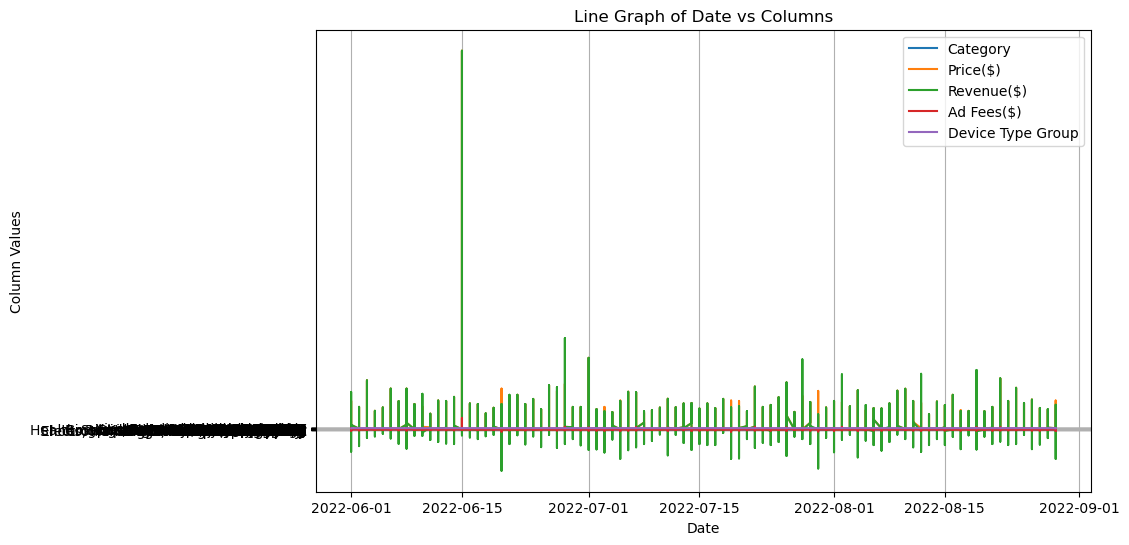

In [4]:
#Create a line graph
import matplotlib.pyplot as plt

# Clean up column names
df.columns = df.columns.str.strip().str.replace('\t', '_')

# Assuming the 'Date' column is present in your DataFrame
date_column = 'Date'  # Replace with your actual column name

# Convert the 'Date' column to datetime if it's not already
df[date_column] = pd.to_datetime(df[date_column])

# Replace 'Category', 'Price($)', 'Revenue($)', 'Ad Fees($)', 'Device Type Group' with your actual column names
columns_to_plot = ['Category', 'Price($)', 'Revenue($)', 'Ad Fees($)', 'Device Type Group']

# Plot the data
plt.figure(figsize=(10, 6))

for column in columns_to_plot:
    plt.plot(df[date_column], df[column], label=column)

plt.title('Line Graph of Date vs Columns')
plt.xlabel('Date')
plt.ylabel('Column Values')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
#The correlation coefficient measures the strength and direction of a linear relationship between two variables. 
#It ranges from -1 to 1
df.corr()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6616\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Unnamed: 6,Price($),Items Shipped,Returns,Revenue($),Ad Fees($)
Unnamed: 6,NaN,NaN,NaN,NaN,NaN,NaN
Price($),NaN,1.000000,-0.039305,0.026578,0.833906,0.786212
Items Shipped,NaN,-0.039305,1.000000,-0.603780,0.191505,0.180832
Returns,NaN,0.026578,-0.603780,1.000000,-0.239330,-0.240302
Revenue($),NaN,0.833906,0.191505,-0.239330,1.000000,0.954408
Ad Fees($),NaN,0.786212,0.180832,-0.240302,0.954408,1.000000


In [12]:
# Split the data into training and test sets
import pandas as pd
from sklearn.model_selection import train_test_split
# 'Adfees' is the target variable and other columns are features
features = ['Price($)', 'Revenue($)',]
target = 'Ad Fees($)'

# Split the data into features (X) and target variable (y)
X = df[features]
y = df[target]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [15]:
#After splitting the data into training and test sets, 
#we perform linear regression using scikit-learn's LinearRegression module.
# Create a linear regression model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
# Apply one-hot encoding to the categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('Rev', OneHotEncoder(handle_unknown='ignore'), ['Revenue($)'])
    ],
    remainder='passthrough'
)

X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train_encoded, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_encoded)

In [16]:
# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the sales for the test data
predictions = model.predict(X_test)

In [17]:
#evaluate the model
from sklearn.metrics import mean_squared_error

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 2.227648468301769


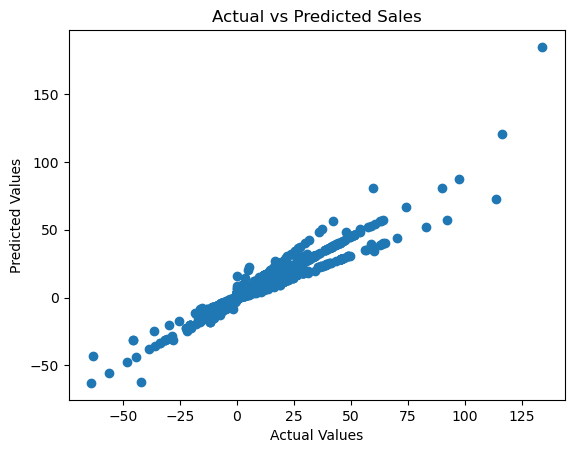

In [18]:
#plot the predicted values
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted values
plt.scatter(y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Sales')
plt.show()